导入数据

In [1]:
import pathlib
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import matplotlib
import re

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False


def find_file(file, suffix):
    return list(pathlib.Path(file).rglob('*.' + suffix))


# pathlib 挺好用的 主要是路径/和\统一了 好看。。。
tensorboard_files = find_file(r'E:\fuckpython\kp2d\records\complete_data\tensorboardX', 'amax')  # 不是字符串
# tensorboard_files = list(map(str, tensorboard_files))
ea_dict = {}
for file_name in tensorboard_files:
    ea = event_accumulator.EventAccumulator(str(file_name))
    ea.Reload()
    ea_dict[file_name.parent.name] = ea
    del ea

看看scalars有哪些key

In [2]:
scalars_keys = []
for key in ea_dict.keys():
    scalars_keys = ea_dict[key].scalars.Keys()
    break

画图

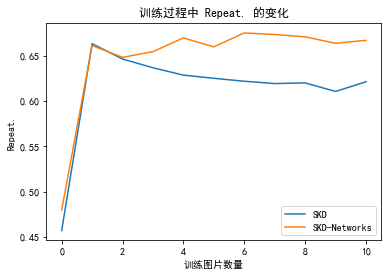

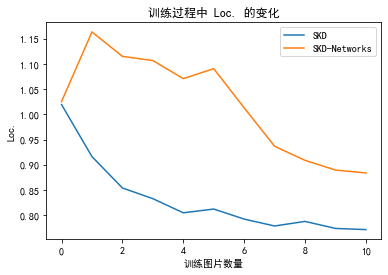

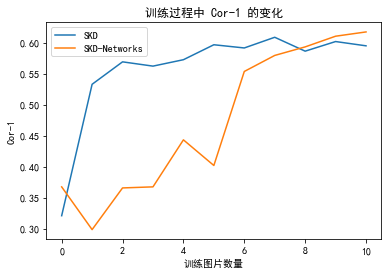

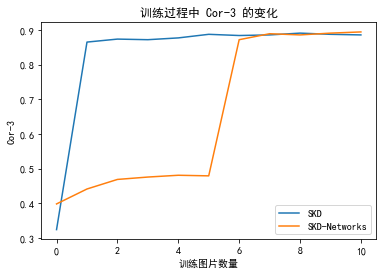

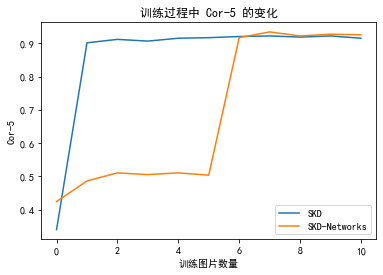

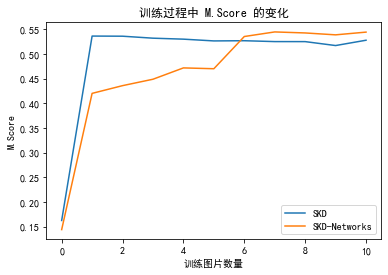

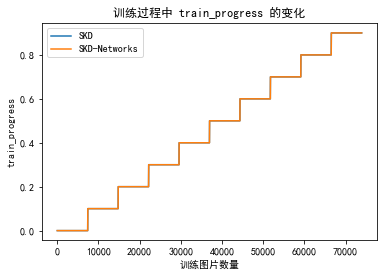

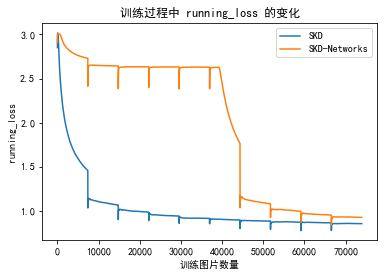

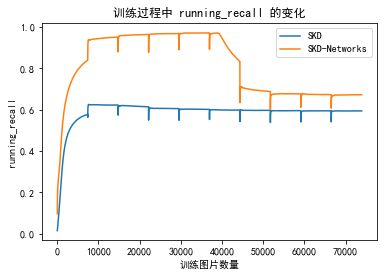

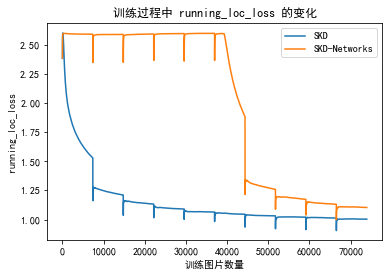

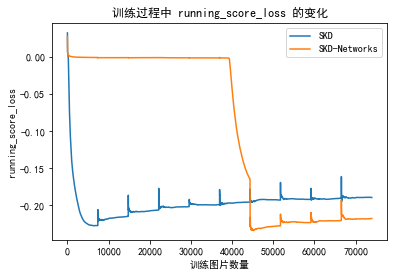

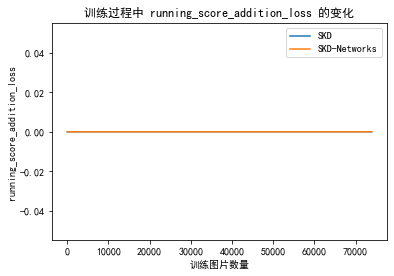

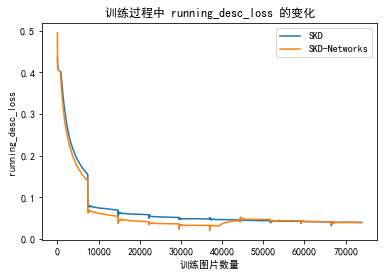

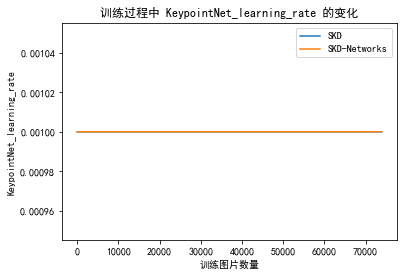

In [11]:
for scalars_key in scalars_keys:
    fig = plt.figure(figsize=(6, 4))
    ax1 = fig.add_subplot(111)
    for key in ea_dict.keys():
        if key == 'v3':
            continue
        hehe = {'v0': "SKD", "v1": "SKD-Networks", "v2": "SKD-LossScore", "v4": "SKD-LossDesc"}
        data = ea_dict[key].scalars.Items(scalars_key)
        ax1.plot([i.step for i in data], [i.value for i in data], label=hehe[key])
        if key == 'v1':
            break

    # tmp_name = re.sub("_", " ", str(scalars_key)).split()
    # tmp_name = ' '.join(tmp_name)
    # print(scalars_key)
    tmp_name = str(scalars_key)
    if tmp_name == 'repeatability_320_256':
        tmp_name = 'Repeat.'
    elif tmp_name == 'localization_320_256':
        tmp_name = 'Loc.'
    elif tmp_name == 'correctness_320_256_1':
        tmp_name = 'Cor-1'
    elif tmp_name == 'correctness_320_256_3':
        tmp_name = 'Cor-3'
    elif tmp_name == 'correctness_320_256_5':
        tmp_name = 'Cor-5'
    elif tmp_name == 'mscore320_256':
        tmp_name = 'M.Score'
    elif tmp_name == 'correctness_320_256_5':
        tmp_name = 'Cor-5'


    ax1.set_xlabel("训练图片数量")
    ax1.set_ylabel(tmp_name)
    ax1.set_title("训练过程中 " + tmp_name + " 的变化")

    # 还是分开画比较好看
    plt.legend(loc='best')
    plt.show()
    tmp_name = re.sub("[^\w]", " ", str(scalars_key)).split()
    tmp_name = '_'.join(tmp_name) + '.svg'
    tmp_name = pathlib.Path(r"E:\doc\本科毕设-20220601\picture\\" + tmp_name)
    fig.savefig(str(tmp_name))